In [83]:
#imports
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df=pd.read_csv(url)


df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [84]:
#create our X and y
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [85]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [86]:
y_train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: medv, dtype: float64

In [87]:
X_train.shape

(354, 13)

In [88]:
y_train.shape

(354,)

In [89]:
X_test.shape

(152, 13)

In [31]:
y_test.shape

(152,)

In [90]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.7434997532004697
Test score: 0.711226005748496
RMSE: 4.638689926172798


In [91]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)


In [92]:
X_test_poly = polynomial_features.transform(X_test)

## Vanilla linear regression

In [93]:
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

print('Training score: {}'.format(lr_model.score(X_train_poly, y_train)))
print('Test score: {}'.format(lr_model.score(X_test_poly, y_test)))

y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.9042977517682433
Test score: 0.5999778576052097
RMSE: 5.45956849261239


## Linear regression with L2 Penalty - Ridge

In [97]:
lr_model = Ridge(alpha=10000, max_iter=10000 )
lr_model.fit(X_train_poly, y_train)

print('Training score: {}'.format(lr_model.score(X_train_poly, y_train)))
print('Test score: {}'.format(lr_model.score(X_test_poly, y_test)))

y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.8920738696921121
Test score: 0.821560452320792
RMSE: 3.6463794466988473


## Linear Regression with L1 Penalty - Lasso

In [100]:
lr_model = Lasso(alpha=50, max_iter=10000 )
lr_model.fit(X_train_poly, y_train)

print('Training score: {}'.format(lr_model.score(X_train_poly, y_train)))
print('Test score: {}'.format(lr_model.score(X_test_poly, y_test)))

y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.8340344277115719
Test score: 0.8016522909524803
RMSE: 3.844411762536022


## Linear Regressionw With Both L1 and L2 Penalty - Elastic

In [76]:
lr_model = ElasticNet(alpha=10, l1_ratio=0.5, max_iter=10000 )
lr_model.fit(X_train_poly, y_train)

print('Training score: {}'.format(lr_model.score(X_train_poly, y_train)))
print('Test score: {}'.format(lr_model.score(X_test_poly, y_test)))

y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.8695138519127135
Test score: 0.8067630056164321
RMSE: 3.7945601365310027


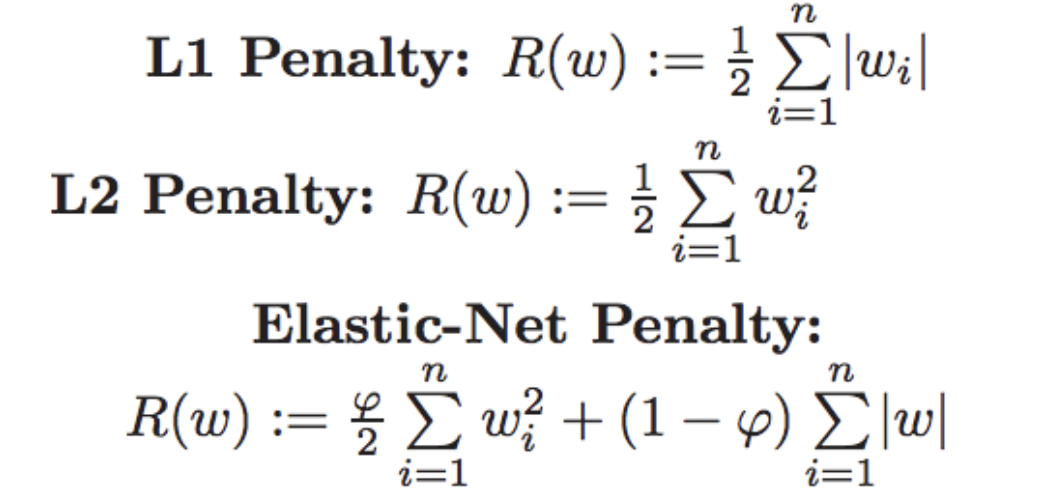

In [50]:

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)